# Breast Tumour Diagnosis Project

### Importing Libraries & Dataset

In [1]:
# Importing Libraries
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import *
import sklearn as sk
from sklearn import *

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, classification_report

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download dataset from kagglehub and save it to the working director
path = kagglehub.dataset_download("abhinavmangalore/breast-cancer-dataset-wisconsin-diagnostic-uci")
print("Path to dataset files:", path)

Path to dataset files: /Users/helenzhou/.cache/kagglehub/datasets/abhinavmangalore/breast-cancer-dataset-wisconsin-diagnostic-uci/versions/1


### Data Preprocessing

The dataset is split into X (features) and y (diagnosis label). Using train_test_split(), data is divided into 70/30 training and testing sets for model training and performance evaluation.

In [3]:
bcdf = pd.read_csv('breast-cancer-wisconsin-data.csv')
df = bcdf.drop(columns=["id"])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Feature Selection
Refined the feature set to improve model interpretability, boost performance, and enhance its ability to accurately classify breast cancer cases.

In [4]:
# Data Preprocessing
train_data, test_data = train_test_split(df, test_size=0.3, random_state=0)
ytrain = train_data['diagnosis']
Xtrain = train_data.drop(columns=['diagnosis'])

model = Pipeline([
   ('sscaler', StandardScaler()),
   ('ridge', sk.linear_model.Ridge())     # Used Ridge bc many parameters impacting result
])

# Polynomial Expansion
polynomial = sk.preprocessing.PolynomialFeatures(degree=2)

# Create training sets (baseline + 1 for every feature)
XtrainBase = polynomial.fit_transform(Xtrain)
XtrainRadius = polynomial.fit_transform(Xtrain.drop(columns=['radius_mean']))
XtrainTexture = polynomial.fit_transform(Xtrain.drop(columns=['texture_mean']))
XtrainPerimeter = polynomial.fit_transform(Xtrain.drop(columns=['perimeter_mean']))
XtrainArea = polynomial.fit_transform(Xtrain.drop(columns=['area_mean']))
XtrainSmoothness = polynomial.fit_transform(Xtrain.drop(columns=['smoothness_mean']))
XtrainCompact = polynomial.fit_transform(Xtrain.drop(columns=['compactness_mean']))
XtrainConcavity = polynomial.fit_transform(Xtrain.drop(columns=['concavity_mean']))
XtrainConcave = polynomial.fit_transform(Xtrain.drop(columns=['concave points_mean']))
XtrainSymmetry = polynomial.fit_transform(Xtrain.drop(columns=['symmetry_mean']))

# Calculate MSE of each training set for comparison against the baseline
model.fit(XtrainBase,ytrain)
cvscores = cross_val_score(model, XtrainBase, ytrain, cv=10, scoring='neg_mean_squared_error')
mseBase = np.mean(-cvscores)
print(f"Mean MSE Training Set (Baseline): {mseBase}")

model.fit(XtrainRadius,ytrain)
cvscores = cross_val_score(model, XtrainRadius, ytrain, cv=10, scoring='neg_mean_squared_error')
mseRadius = np.mean(-cvscores)
print(f"Mean MSE Training Set (Radius): {mseRadius}")

model.fit(XtrainTexture,ytrain)
cvscores = cross_val_score(model, XtrainTexture, ytrain, cv=10, scoring='neg_mean_squared_error')
mseTexture = np.mean(-cvscores)
print(f"Mean MSE Training Set (Texture): {mseTexture}")

model.fit(XtrainPerimeter,ytrain)
cvscores = cross_val_score(model, XtrainPerimeter, ytrain, cv=10, scoring='neg_mean_squared_error')
msePerimeter = np.mean(-cvscores)
print(f"Mean MSE Training Set (Perimeter): {msePerimeter}")

model.fit(XtrainArea,ytrain)
cvscores = cross_val_score(model, XtrainArea, ytrain, cv=10, scoring='neg_mean_squared_error')
mseArea = np.mean(-cvscores)
print(f"Mean MSE Training Set (Area): {mseArea}")

model.fit(XtrainSmoothness,ytrain)
cvscores = cross_val_score(model, XtrainSmoothness, ytrain, cv=10, scoring='neg_mean_squared_error')
mseSmoothness = np.mean(-cvscores)
print(f"Mean MSE Training Set (Smoothness): {mseSmoothness}")

model.fit(XtrainCompact,ytrain)
cvscores = cross_val_score(model, XtrainCompact, ytrain, cv=10, scoring='neg_mean_squared_error')
mseCompact = np.mean(-cvscores)
print(f"Mean MSE Training Set (Compactness): {mseCompact}")

model.fit(XtrainConcavity,ytrain)
cvscores = cross_val_score(model, XtrainConcavity, ytrain, cv=10, scoring='neg_mean_squared_error')
mseConcavity = np.mean(-cvscores)
print(f"Mean MSE Training Set (Concavity): {mseConcavity}")

model.fit(XtrainConcave,ytrain)
cvscores = cross_val_score(model, XtrainConcave, ytrain, cv=10, scoring='neg_mean_squared_error')
mseConcave = np.mean(-cvscores)
print(f"Mean MSE Training Set (Concave Points): {mseConcave}")

model.fit(XtrainSymmetry,ytrain)
cvscores = cross_val_score(model, XtrainSymmetry, ytrain, cv=10, scoring='neg_mean_squared_error')
mseSymmetry = np.mean(-cvscores)
print(f"Mean MSE Training Set (Symmetry): {mseSymmetry}")

# Create training subsets for comparison 
XtrainAll = polynomial.fit_transform(Xtrain.drop(columns=['texture_mean', 'area_mean', 'compactness_mean','concave points_mean', 'smoothness_mean', 'radius_mean']))
XtrainBest = polynomial.fit_transform(Xtrain.drop(columns=['texture_mean', 'area_mean', 'compactness_mean']))
XtrainWorst = polynomial.fit_transform(Xtrain.drop(columns=['perimeter_mean', 'symmetry_mean', 'concavity_mean']))

model.fit(XtrainAll,ytrain)
cvscores = cross_val_score(model, XtrainAll, ytrain, cv=10, scoring='neg_mean_squared_error')
mseAll = np.mean(-cvscores)
print(f"Mean MSE Training Set (All - removed): {mseAll}")

model.fit(XtrainBest,ytrain)
cvscores = cross_val_score(model, XtrainBest, ytrain, cv=10, scoring='neg_mean_squared_error')
mseBest = np.mean(-cvscores)
print(f"Mean MSE Training Set (Worst - removed): {mseBest}")

model.fit(XtrainWorst,ytrain)
cvscores = cross_val_score(model, XtrainWorst, ytrain, cv=10, scoring='neg_mean_squared_error')
mseWorst = np.mean(-cvscores)
print(f"Mean MSE Training Set (Best - removed): {mseWorst}")

Mean MSE Training Set (Baseline): 0.1739959369994376
Mean MSE Training Set (Radius): 0.17328651276341409
Mean MSE Training Set (Texture): 0.15967663373509206
Mean MSE Training Set (Perimeter): 0.17395926527159128
Mean MSE Training Set (Area): 0.16518791302131236
Mean MSE Training Set (Smoothness): 0.17204558732639083
Mean MSE Training Set (Compactness): 0.1686472392480049
Mean MSE Training Set (Concavity): 0.19582789647426244
Mean MSE Training Set (Concave Points): 0.1704425687787366
Mean MSE Training Set (Symmetry): 0.18539093722149114
Mean MSE Training Set (All - removed): 0.1394744820120015
Mean MSE Training Set (Worst - removed): 0.14749697802589862
Mean MSE Training Set (Best - removed): 0.20556152979956632


### Data Visualization

These visualizations are used to explore the relationships between variables, providing insights into their significance and potential impact on breast cancer diagnosis.

Pairplot Scatter Matrix

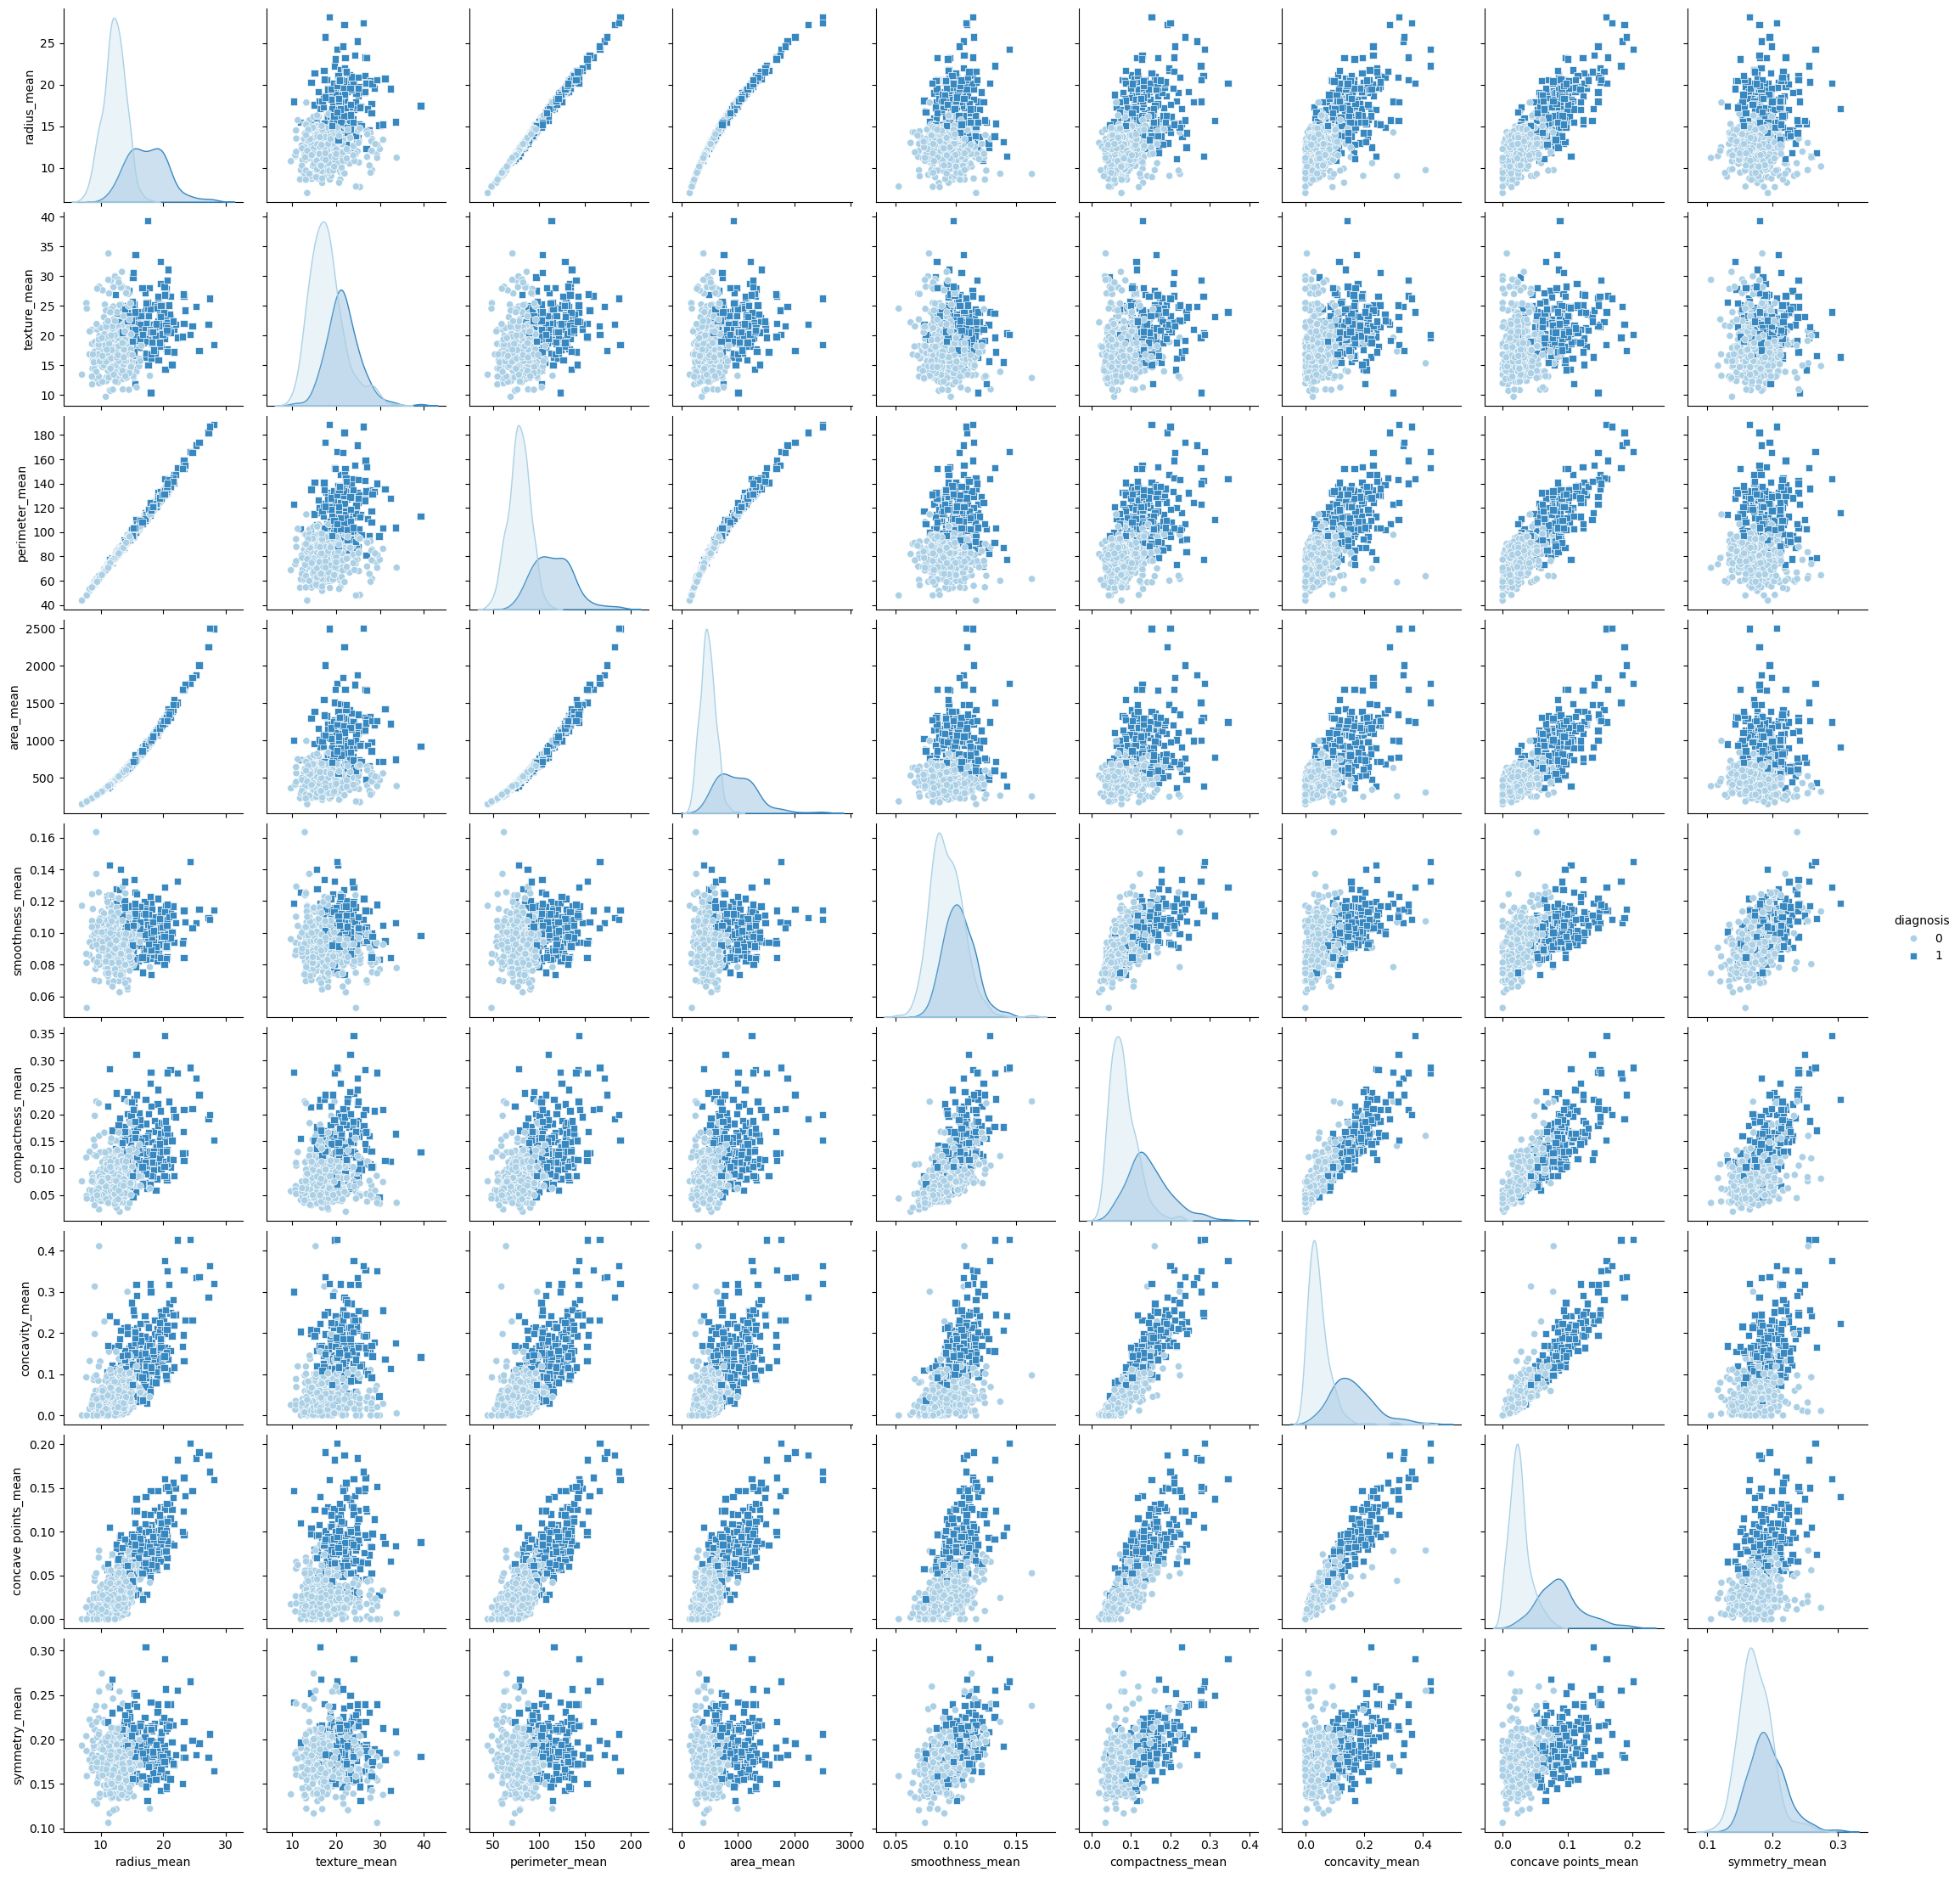

In [5]:
# Create a pairplot (all columns) to visualize individual feature impact on diagnosis
columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean','concavity_mean', 'concave points_mean','symmetry_mean','diagnosis']  # replace with your relevant column names
sns.pairplot(df[columns], hue='diagnosis', markers=["o", "s"], palette="Blues")
plt.show()

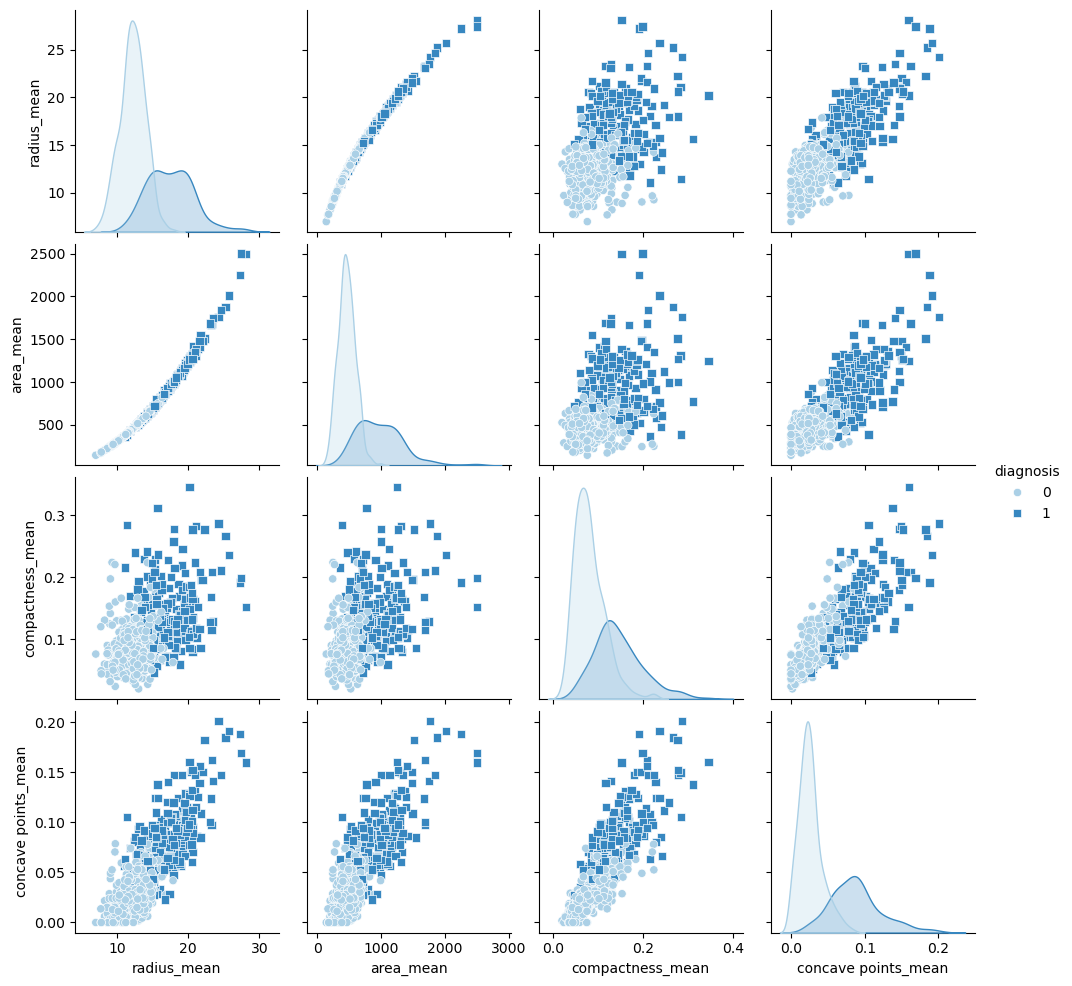

In [6]:
# Create a pairplot with selected columns
columns = ['radius_mean', 'area_mean', 'compactness_mean','concave points_mean','diagnosis'] 
sns.pairplot(df[columns], hue='diagnosis', markers=["o", "s"], palette="Blues")
plt.show()

Heat Map

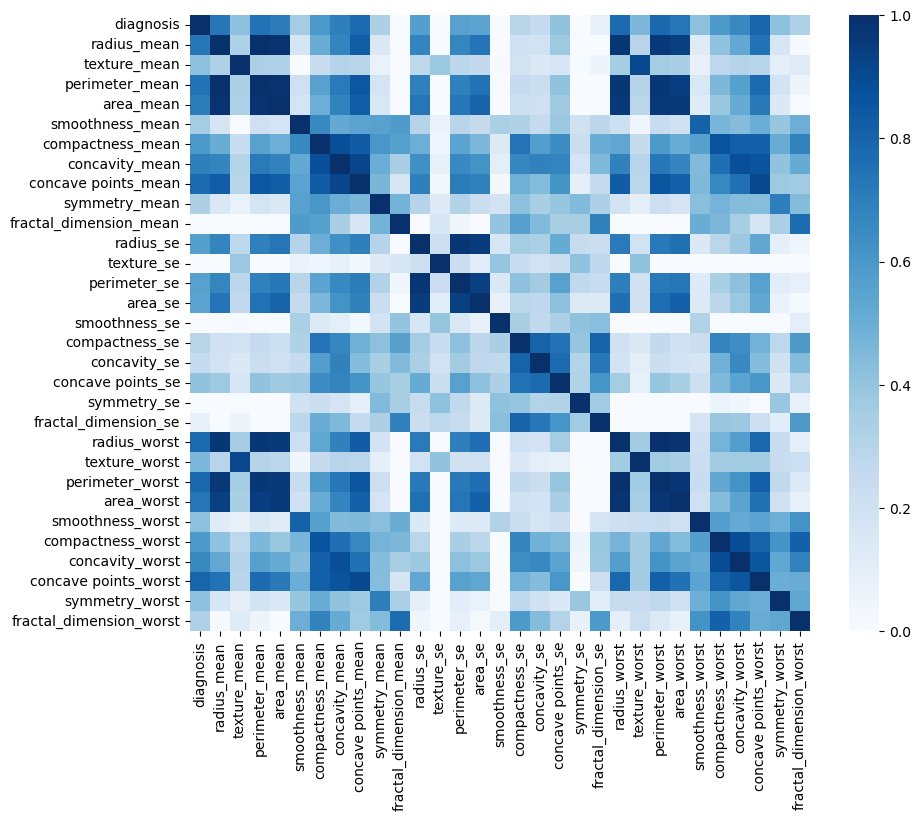

In [7]:
# Create a heatmap (all columns)
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="Blues", vmin = 0, vmax = 1, center = 0.5)
plt.show()

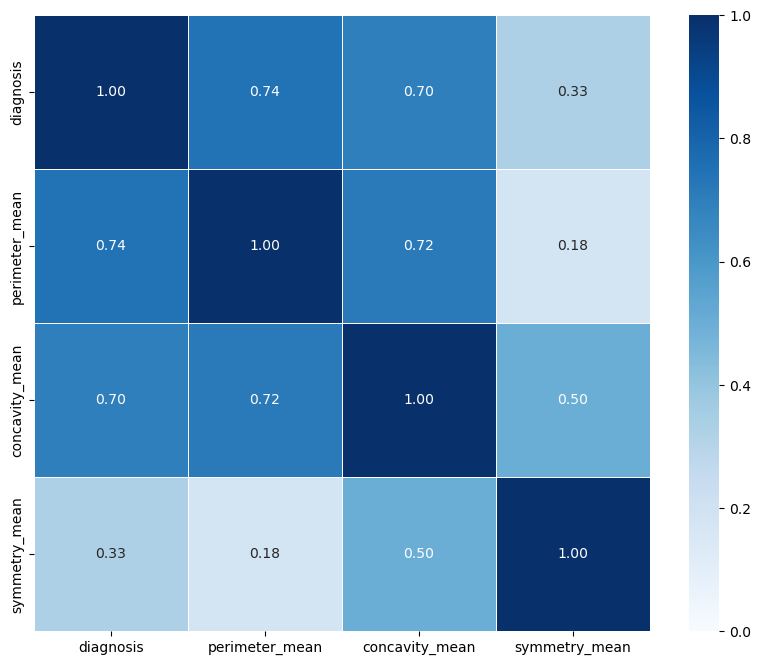

In [8]:
# Create a heatmap using predictors with significant distribution overlap
col2 = ['diagnosis','perimeter_mean', 'concavity_mean', 'symmetry_mean']

corr_matrix = df[col2].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="Blues", vmin = 0, vmax = 1, center = 0.5, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

Box Plots

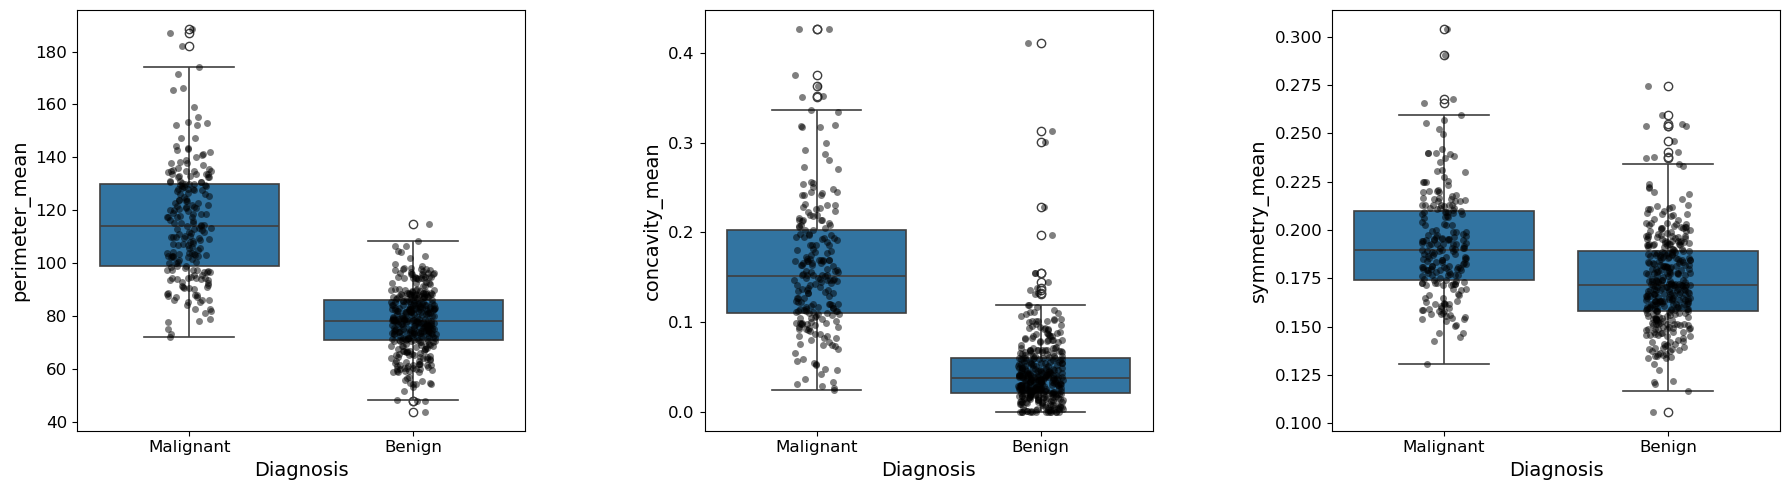

In [9]:
# Create a box plot (predictors with significant distribution overlap)
col3 = ['perimeter_mean', 'concavity_mean', 'symmetry_mean']

df["diagnosis"] = df["diagnosis"].map({0: "Benign", 1: "Malignant"})
df = df.dropna(subset=["diagnosis"] + col3)

num_plots = len(col3)
cols = 3
rows = (num_plots // cols) + (num_plots % cols > 0) 

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axes = axes.flatten() 

for i, col in enumerate(col3):
    sns.boxplot(x=df["diagnosis"], y=df[col], linewidth=1.2, ax=axes[i]) 
    sns.stripplot(x=df["diagnosis"], y=df[col], color="black", alpha=0.5, jitter=True, ax=axes[i])

    axes[i].set_xlabel("Diagnosis", fontsize=14)
    axes[i].set_ylabel(col, fontsize=14)

    axes[i].tick_params(axis="both", labelsize=12)

for j in range(num_plots, rows * cols):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

### Model Comparison

Data preparation: 
* df is loaded again, 
* diagnosis are labled with malignant=1 and benigh = 0, data is split 70/30, 
* the number of features included in the training is also updated usign the result of feature selection.

In [10]:
bcdf = pd.read_csv('breast-cancer-wisconsin-data.csv')
df = bcdf.drop(columns=["id"])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
# Data Preparation (drop columns)
X1 = df.drop('diagnosis', axis='columns')
X = X1.drop(['area_mean', 'compactness_mean', 'texture_mean', 
             'area_worst', 'compactness_worst', 
             'texture_worst', ], axis='columns')
y = df.diagnosis.values
# Splitting code here
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

Function to calculate the mean standard error

In [11]:
# Function to calculate the mean standard error
def mse(y,ypred):
    return np.mean((y-ypred)**2)

In [12]:
# Linear model
linmodel = LinearRegression().fit(Xtrain,ytrain)
trainloss = mse(ytrain,linmodel.predict(Xtrain))
print(f"Training loss: {trainloss}")
testloss = mse(ytest,linmodel.predict(Xtest))
print(f"Testing loss: {testloss}")

kf = KFold(n_splits=5,shuffle=False)
sc = make_scorer(mse)
cv_scores = cross_val_score(linmodel, Xtrain, ytrain, cv=kf, scoring=sc)
print(f"CV loss: {cv_scores.mean()}")

Training loss: 0.05589299809260161
Testing loss: 0.06629700784421381
CV loss: 0.06687851026501322


In [13]:
# Logistic Regression
DFLR = LogisticRegression(penalty='l2',max_iter=1000000)
dflr = DFLR.fit(Xtrain,ytrain)

trainloss = mse(ytrain,dflr.predict(Xtrain))
print(f"Training loss: {trainloss}")
testloss = mse(ytest,dflr.predict(Xtest))
print(f"Testing loss: {testloss}")

kf = KFold(n_splits=5,shuffle=False)
sc = make_scorer(mse)
cv_scores = cross_val_score(dflr, Xtrain, ytrain, cv=kf, scoring=sc)
print(f"CV loss: {cv_scores.mean()}")

Training loss: 0.04522613065326633
Testing loss: 0.04678362573099415
CV loss: 0.05018987341772152


In [14]:
# K-nearest neighbor (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, ytrain)

# Make predictions
trainloss = mse(ytrain,knn.predict(Xtrain))
print(f"Training loss: {trainloss}")
testloss = mse(ytest,knn.predict(Xtest))
print(f"Testing loss: {testloss}")

kf = KFold(n_splits=5,shuffle=False)
sc = make_scorer(mse)
cv_scores = cross_val_score(knn, Xtrain, ytrain, cv=kf, scoring=sc)
print(f"CV loss: {cv_scores.mean()}")

Training loss: 0.052763819095477386
Testing loss: 0.08771929824561403
CV loss: 0.08544303797468354


In [15]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Random Forest model
rf = RandomForestClassifier(n_estimators=500, max_features=3,random_state=0)
rf.fit(Xtrain, ytrain)

# Make predictions
trainloss = mse(ytrain,rf.predict(Xtrain))
print(f"Training loss: {trainloss}")
testloss = mse(ytest,rf.predict(Xtest))
print(f"Testing loss: {testloss}")

kf = KFold(n_splits=5,shuffle=False)
sc = make_scorer(mse)
cv_scores = cross_val_score(rf, Xtrain, ytrain, cv=kf, scoring=sc)
print(f"CV loss: {cv_scores.mean()}")

Training loss: 0.0
Testing loss: 0.05263157894736842
CV loss: 0.05268987341772152


In [16]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Naive Bayes model
nb = GaussianNB()
nb.fit(Xtrain, ytrain)

trainloss = mse(ytrain,nb.predict(Xtrain))
print(f"Training loss: {trainloss}")
testloss = mse(ytest,nb.predict(Xtest))
print(f"Testing loss: {testloss}")

kf = KFold(n_splits=5,shuffle=False)
sc = make_scorer(mse)
cv_scores = cross_val_score(nb, Xtrain, ytrain, cv=kf, scoring=sc)
print(f"CV loss: {cv_scores.mean()}")

Training loss: 0.052763819095477386
Testing loss: 0.08187134502923976
CV loss: 0.06525316455696203


In [17]:
# Decision tree
dt = DecisionTreeClassifier(random_state=42)

dt.fit(Xtrain, ytrain)
trainloss = mse(ytrain,dt.predict(Xtrain))
print(f"Training loss: {trainloss}")
testloss = mse(ytest,dt.predict(Xtest))
print(f"Testing loss: {testloss}")

kf = KFold(n_splits=5,shuffle=False)
sc = make_scorer(mse)
cv_scores = cross_val_score(dt, Xtrain, ytrain, cv=kf, scoring=sc)
print(f"CV loss: {cv_scores.mean()}")

Training loss: 0.0
Testing loss: 0.07017543859649122
CV loss: 0.08291139240506329


In [18]:
import warnings
warnings.filterwarnings('ignore')
# Polynomial
#Generate polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(Xtrain)
X_test_poly = poly.transform(Xtest)

#Train logistic regression model
plm = LogisticRegression(max_iter=5000)
plm.fit(X_train_poly, ytrain)

trainloss = mse(ytrain,plm.predict(X_train_poly))
print(f"Training loss: {trainloss}")
testloss = mse(ytest,plm.predict(X_test_poly))
print(f"Testing loss: {testloss}")

kf = KFold(n_splits=5,shuffle=False)
sc = make_scorer(mse)
cv_scores = cross_val_score(plm, X_train_poly, ytrain, cv=kf, scoring=sc)
print(f"CV loss: {cv_scores.mean()}")


Training loss: 0.01256281407035176
Testing loss: 0.05263157894736842
CV loss: 0.05525316455696202


In [19]:
# XGBoost
xgb = XGBClassifier(n_estimators=500, max_depth=3, learning_rate=0.1)
xgb.fit(Xtrain, ytrain)

trainloss = mse(ytrain,xgb.predict(Xtrain))
print(f"Training loss: {trainloss}")
testloss = mse(ytest,xgb.predict(Xtest))
print(f"Testing loss: {testloss}")

kf = KFold(n_splits=5,shuffle=False)
sc = make_scorer(mse)
cv_scores = cross_val_score(xgb, Xtrain, ytrain, cv=kf, scoring=sc)
print(f"CV loss: {cv_scores.mean()}")

Training loss: 0.0
Testing loss: 0.05847953216374269
CV loss: 0.06281645569620253


### Model Evaluation



Function to compute performance metrics and cross validation

In [20]:
# Function to compute model performance:
def compute_performance(yhat, y, classes):
    # Calculate TP, TN, FP, FN
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    # Confusion matrix display using a DataFrame
    confusion_matrix = pd.DataFrame({
        "Predicted Positive": [tp, fp],
        "Predicted Negative": [fn, tn]
    }, index=["Actual Positive", "Actual Negative"])

    print("\nConfusion Matrix:")
    print(confusion_matrix)

    # Calculate metrics
    acc = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    sensitivity = recall
    specificity = tn / (fp + tn) if (fp + tn) > 0 else 0

    # Display metrics with rounded values
    print("\nMetrics:")
    print(f"Accuracy: {acc:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Sensitivity: {sensitivity:.3f}")
    print(f"Specificity: {specificity:.3f}")

In [21]:
# Define Kfold crossvalidation with random shuffling
x=np.arange(20)
kf = KFold(n_splits=5,shuffle=True)
for train,test in kf.split(x):
    print("%s %s" % (train, test))
# Check CV loss
kf = KFold(n_splits=5,shuffle=False)
sc = make_scorer(mse)

[ 0  1  2  3  4  6  7  8  9 11 12 13 14 15 17 19] [ 5 10 16 18]
[ 0  1  2  3  4  5  9 10 11 12 13 14 16 17 18 19] [ 6  7  8 15]
[ 0  2  3  4  5  6  7  8  9 10 11 12 14 15 16 18] [ 1 13 17 19]
[ 1  3  4  5  6  7  8 10 11 12 13 15 16 17 18 19] [ 0  2  9 14]
[ 0  1  2  5  6  7  8  9 10 13 14 15 16 17 18 19] [ 3  4 11 12]


In [22]:
## Evaluate polynomial logistic regression
print("For 2nd Degree Polynomial Logistic Regression")
dflr = plm.fit(Xtrain,ytrain)
# Predict probabilities using the totChol-only model
yprob1 = dflr.predict_proba(Xtest)[:, 1]  # Probabilities for the positive class
# Apply the threshold of 0.5 to get predicted labels (1 if >= 0.5, otherwise 0)
yhat1 = (yprob1 >= 0.2).astype(int)
compute_performance(yhat1,ytest,classes=[0, 1])

cv_scores1 = cross_val_score(dflr, X, y, cv=kf, scoring=sc)
print("")
print(f"CV loss: {cv_scores1.mean()}")

For 2nd Degree Polynomial Logistic Regression

Confusion Matrix:
                 Predicted Positive  Predicted Negative
Actual Positive                  62                   1
Actual Negative                  14                  94

Metrics:
Accuracy: 0.912
Recall: 0.984
Precision: 0.816
Sensitivity: 0.984
Specificity: 0.870

CV loss: 0.05095482068001863


In [23]:
print("For XGboost Tree")
xgboost = xgb.fit(Xtrain, ytrain)
yprob2 = xgboost.predict_proba(Xtest)[:, 1]
yhat2 = (yprob2 >= 0.2).astype(int)
# Compute performance
compute_performance(yhat2, ytest, classes=[0, 1])

cv_scores2 = cross_val_score(xgboost, X, y, cv=kf, scoring=sc)

print("")
print(f"CV loss: {cv_scores2.mean()}")

For XGboost Tree

Confusion Matrix:
                 Predicted Positive  Predicted Negative
Actual Positive                  61                   2
Actual Negative                   7                 101

Metrics:
Accuracy: 0.947
Recall: 0.968
Precision: 0.897
Sensitivity: 0.968
Specificity: 0.935

CV loss: 0.05269368110541841


In [24]:
print("For Random Forest Tree")
yprob3 = rf.predict_proba(Xtest)[:, 1]
yhat3 = (yprob3 >= 0.2).astype(int)
# Compute performance
compute_performance(yhat3, ytest, classes=[0, 1])

cv_scores3 = cross_val_score(rf, X, y, cv=kf, scoring=sc)

print("")
print(f"CV loss: {cv_scores3.mean()}")

For Random Forest Tree

Confusion Matrix:
                 Predicted Positive  Predicted Negative
Actual Positive                  63                   0
Actual Negative                  16                  92

Metrics:
Accuracy: 0.906
Recall: 1.000
Precision: 0.797
Sensitivity: 1.000
Specificity: 0.852

CV loss: 0.04916938363608135


AUROC: 0.994


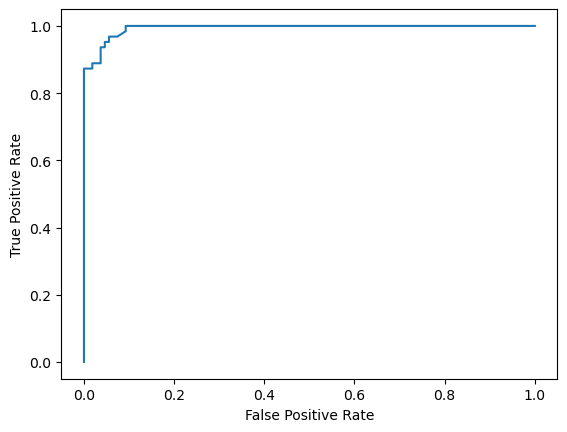

In [25]:
# ROC for random forest tree classifier
yprob = rf.predict_proba(Xtest)[:, 1]  # Get predicted probabilities for class 1
fpr, tpr, _ = roc_curve(ytest, yprob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Full Feature Classifier (AUROC = {roc_auc:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
print(f"AUROC: {roc_auc:.3f}")
plt.show()

Precision-Recall AUC for Full Feature classifier: 0.989


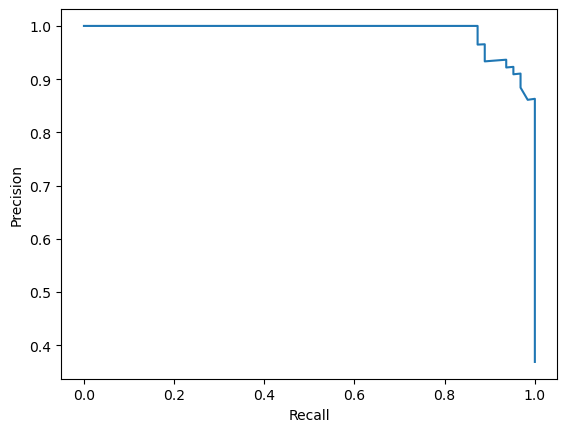

In [26]:
# PRC for random forest tree classifier
precision, recall, _ = precision_recall_curve(ytest, yprob)
plt.plot(recall, precision, label='Full Feature Classifier')
plt.xlabel("Recall")
plt.ylabel("Precision")
auc_full = auc(recall, precision)
print(f"Precision-Recall AUC for Full Feature classifier: {auc_full:.3f}")
plt.show()